In [76]:
import pickle
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [20]:
# Read features
infile = open('Image_featuresVGG16.pckl','rb')
features = pickle.load(infile)
infile.close()

# Classification (feature set VGG16)

In [37]:
# Array to store results of classifiers
Results = np.empty((6,3), dtype='object')
Validation = np.empty((6,5), dtype='object')

In [111]:
# Split data
real_labels = features[:,-1]
features = features[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(features, real_labels, test_size=0.2, stratify = real_labels)

## Logistic Regression

In [112]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 0.0 %
Error test: 0.6651884700665134 %


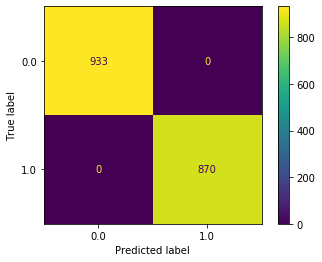

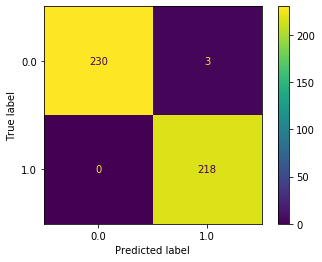

In [113]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
Results[0,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
Results[0,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")


In [116]:
for k in range(2,7):
    cross_scores = cross_val_score(logistic, features, real_labels, cv=k)
    Validation[0,k-2] = np.mean(cross_scores)
    print("Scores for k = ", k)
    print("-->",np.mean(cross_scores))

Scores for k =  2
--> 0.9525288376220054
Scores for k =  3
--> 0.9383174679623387
Scores for k =  4
--> 0.9365174218661427
Scores for k =  5
--> 0.9666863759546687
Scores for k =  6
--> 0.9760106382978724


## SVM (linear kernel)

In [14]:
parameters = {'C':[0.1,0.01,1,10]}
linear_kernel_svm_clf = SVC(kernel = "linear")
clf_linear = GridSearchCV(linear_kernel_svm_clf, parameters)
print(clf_linear.best_params_)
Results[1,2]=clf_linear.best_params_

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 0.01, 1, 10]})

In [72]:
clf_linear = SVC(kernel = "linear", C = 0.1)
clf_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

Error train: 0.0 %
Error test: 1.3303769401330379 %


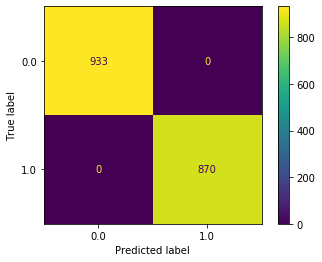

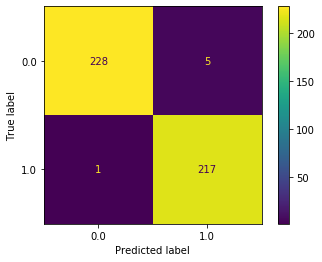

In [73]:
plot_confusion_matrix(clf_linear,X_train,y_train)
err = np.sum(clf_linear.predict(X_train) == y_train)/len(y_train)
Results[1,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_linear,X_test,y_test)
err = np.sum(clf_linear.predict(X_test) == y_test)/len(y_test)
Results[1,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [74]:
for k in range(2,7):
    cross_scores = cross_val_score(clf_linear, features, real_labels, cv=k)
    Validation[1,k-2] = np.mean(cross_scores)
    print("Scores for k = ", k)
    print("-->",np.mean(cross_scores))

Scores for k =  2
--> 0.9516415261756876
Scores for k =  3
--> 0.9383162875031873
Scores for k =  4
--> 0.9351852726654322
Scores for k =  5
--> 0.9666893323478689
Scores for k =  6
--> 0.975566193853428


## SVM (polynomial)

In [40]:
parameters = {'degree':[2,3,4,5,6,7,8,9,10], 'C':[0.1,0.01,1,10]}
poly_kernel_svm_clf = SVC(kernel = "poly")
clf = GridSearchCV(poly_kernel_svm_clf, parameters)
print(clf.best_params_)
Results[2,2]=clf.best_params_

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 0.01, 1, 10],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
clf = SVC(kernel = "poly", C = 10, degree = 2)
clf.fit(X_train, y_train)

{'C': 10, 'degree': 2}
Error train: 0.0 %
Error test: 1.3303769401330379 %


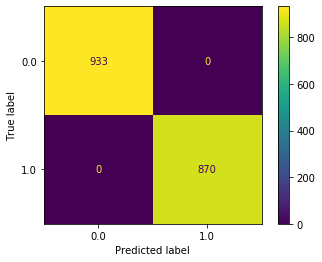

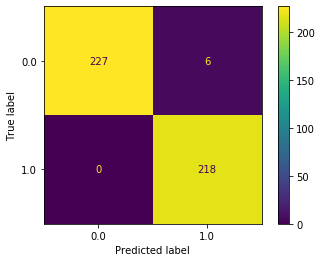

In [41]:
plot_confusion_matrix(clf,X_train,y_train)
err = np.sum(clf.predict(X_train) == y_train)/len(y_train)
Results[2,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf,X_test,y_test)
err = np.sum(clf.predict(X_test) == y_test)/len(y_test)
Results[2,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [47]:
clf = SVC(kernel = "poly", C = 10, degree = 2)
for k in range(2,7):
    cross_scores = cross_val_score(clf, features, real_labels, cv=k)
    Validation[2,k-2] = np.mean(cross_scores)
    print("Scores for k = ", k)
    print("-->",np.mean(cross_scores))

Scores for k =  2
--> 0.9436557231588287
Scores for k =  3
--> 0.9392104853103662
Scores for k =  4
--> 0.9320840104304449
Scores for k =  5
--> 0.9631357477211135
Scores for k =  6
--> 0.9733486997635934


## SVM (rbf)

In [44]:
parameters = {'gamma':[0.01,0.1, 1], 'C':[0.1,0.01,1]}
rbf_kernel_svm_clf = SVC(kernel = "rbf")
clf_rbf = GridSearchCV(rbf_kernel_svm_clf, parameters)
clf_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1], 'gamma': [0.01, 0.1, 1]})

{'C': 0.1, 'gamma': 0.01}
Error train: 48.25291181364393 %
Error test: 48.33702882483371 %


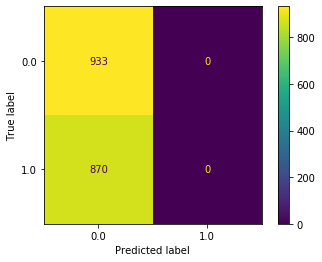

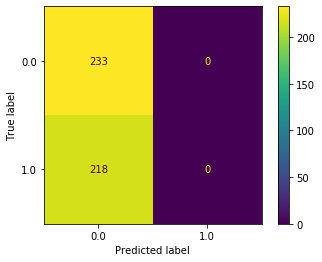

In [45]:
print(clf_rbf.best_params_)
Results[3,2]=clf_rbf.best_params_

plot_confusion_matrix(clf_rbf,X_train,y_train)
err = np.sum(clf_rbf.predict(X_train) == y_train)/len(y_train)
Results[3,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rbf, X_test,y_test)
err = np.sum(clf_rbf.predict(X_test) == y_test)/len(y_test)
Results[3,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [48]:
clf_rbf = SVC(kernel = "rbf", C = 0.1, gamma = 0.01)
for k in range(2,7):
    cross_scores = cross_val_score(clf_rbf, features, real_labels, cv=k)
    Validation[3,k-2] = np.mean(cross_scores)
    print("Scores for k = ", k)
    print("-->",np.mean(cross_scores))

Scores for k =  2
--> 0.5173025732031943
Scores for k =  3
--> 0.5173025800115213
Scores for k =  4
--> 0.5173021931647833
Scores for k =  5
--> 0.5173027839369302
Scores for k =  6
--> 0.5173026004728132


## Random Forest

In [52]:
parameters = {'criterion':['gini', 'entropy']}
random_forest = RandomForestClassifier()
clf_rf = GridSearchCV(random_forest, parameters)
print(clf_rf.best_params_)
Results[4,2]=clf_rf.best_params_

{'criterion': 'entropy'}


In [57]:
clf_rf = RandomForestClassifier(criterion = 'entropy')
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

Error train: 0.0 %
Error test: 3.5476718403547713 %


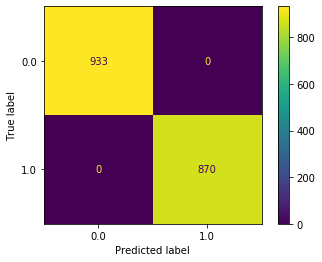

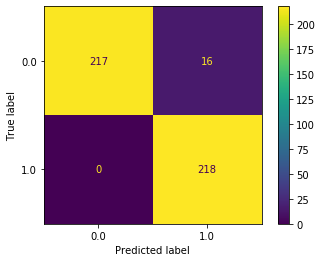

In [59]:
#print(clf_rf.best_params_)
#Results[3,2]=clf_rf.best_params_

#clf_rf.fit(X_train, y_train)
#predictions = clf_rf.predict(X_train)
#CM = confusion_matrix(labels, predictions)
#print(conf_mat)
plot_confusion_matrix(clf_rf,X_train,y_train)
err = np.sum(clf_rf.predict(X_train) == y_train)/len(y_train)
Results[4,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_rf, X_test,y_test)
err = np.sum(clf_rf.predict(X_test) == y_test)/len(y_test)
Results[4,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [60]:
for k in range(2,7):
    cross_scores = cross_val_score(clf_rf, features, real_labels, cv=k)
    Validation[4,k-2] = np.mean(cross_scores)
    print("Scores for k = ", k)
    print("-->",np.mean(cross_scores))

Scores for k =  2
--> 0.9503105590062112
Scores for k =  3
--> 0.9400881566894258
Scores for k =  4
--> 0.9422845571469962
Scores for k =  5
--> 0.9582389751170238
Scores for k =  6
--> 0.971562647754137


## Gradient Boosting

In [69]:
clf_gb = GradientBoostingClassifier(learning_rate = 0.1)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier()

Error train: 0.0 %
Error test: 2.4390243902439046 %


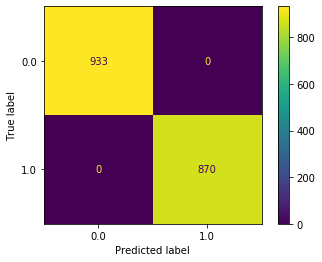

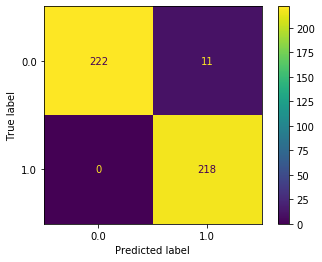

In [70]:
#print(clf_gb.best_params_)
Results[5,2]= 0.1

plot_confusion_matrix(clf_gb,X_train,y_train)
err = np.sum(clf_gb.predict(X_train) == y_train)/len(y_train)
Results[5,0]=str((1-err)*100)+"%"
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_gb, X_test,y_test)
err = np.sum(clf_gb.predict(X_test) == y_test)/len(y_test)
Results[5,1]=str((1-err)*100)+"%"
print("Error test:",(1-err)*100,"%")

In [71]:
for k in range(2,7):
    cross_scores = cross_val_score(clf_rf, features, real_labels, cv=k)
    Validation[5,k-2] = np.mean(cross_scores)
    print("Scores for k = ", k)
    print("-->",np.mean(cross_scores))

Scores for k =  2
--> 0.9591836734693877
Scores for k =  3
--> 0.9396466649668055
Scores for k =  4
--> 0.937843272489072
Scores for k =  5
--> 0.9626794777038679
Scores for k =  6
--> 0.9693380614657211


# Results

In [115]:
pd.DataFrame(data=Results, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["Error train","Error test","Parameters"])

,Error train,Error test,Parameters
Logistic Regression,0.0%,0.6651884700665134%,None
SVM linear kernel,0.0%,1.3303769401330379%,None
SVM polynomial kernel,0.0%,1.3303769401330379%,"{'C': 10, 'degree': 2}"
SVM rbf kernel,48.25291181364393%,48.33702882483371%,"{'C': 0.1, 'gamma': 0.01}"
Random Forest,0.0%,3.5476718403547713%,{'criterion': 'entropy'}
Gradient Boosting,0.0%,2.4390243902439046%,0.1


In [86]:
Av = []
for i in range(6):
    Av.append(np.mean(Validation[i,:]))
Av = np.array(Av)
Av = Av.reshape(Av.shape[0],1)
Validation = np.append(Validation, Av, axis = 1)

In [87]:
pd.DataFrame(data = Validation, index=["Logistic Regression", "SVM linear kernel","SVM polynomial kernel","SVM rbf kernel","Random Forest", "Gradient Boosting"], columns=["k = 2","k = 3", "k = 4", "k = 5", "k = 6", "Mean"])

,k = 2,k = 3,k = 4,k = 5,k = 6,Mean
Logistic Regression,0.952529,0.938761,0.936517,0.966686,0.976011,0.954101
SVM linear kernel,0.951642,0.938316,0.935185,0.966689,0.975566,0.95348
SVM polynomial kernel,0.943656,0.93921,0.932084,0.963136,0.973349,0.950287
SVM rbf kernel,0.517303,0.517303,0.517302,0.517303,0.517303,0.517303
Random Forest,0.950311,0.940088,0.942285,0.958239,0.971563,0.952497
Gradient Boosting,0.959184,0.939647,0.937843,0.962679,0.969338,0.953738


## Dimensionality Reduction

In [88]:
X_e= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(features)

In [104]:
def plotPredictions(Xe,target,pred,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.title.set_text('Real')
    ax2.title.set_text('Predicted')
    ax1.scatter(Xe[target==0,0],Xe[target==0,1],c="c",label="Empty")
    ax1.scatter(Xe[target==1,0],Xe[target==1,1],c="black",label="Occupied")
    ax2.scatter(Xe[pred==0,0],Xe[pred==0,1],c="c",label="Empty")
    ax2.scatter(Xe[pred==1,0],Xe[pred==1,1],c="black",label="Occupied")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')
    fig.set_size_inches(10, 5, forward=True)
    fig.suptitle(title)
    plt.show()

## Learning in lower dimensions (train best performance classifier in higher)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_e, real_labels, test_size=0.2, stratify = real_labels)

### Logistic Regression

In [91]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Error train: 3.660565723793674 %
Error test: 3.104212860310418 %


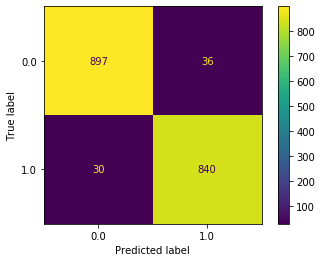

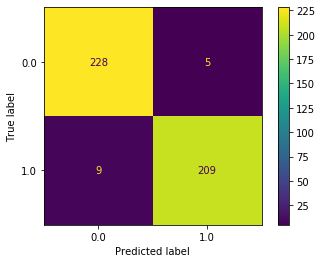

In [92]:
plot_confusion_matrix(logistic,X_train,y_train)
err = np.sum(logistic.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(logistic,X_test,y_test)
err = np.sum(logistic.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

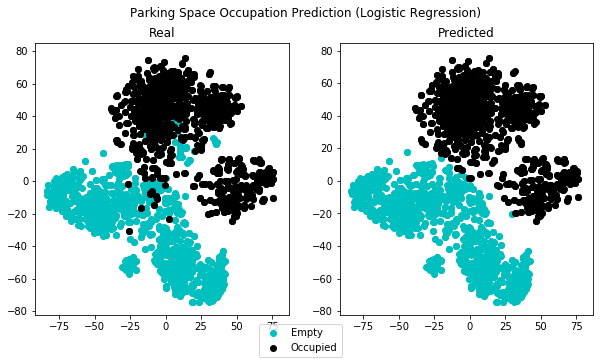

In [106]:
labels = logistic.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (Logistic Regression)")

### Gradient Boosting

In [107]:
clf_gb = GradientBoostingClassifier(learning_rate = 0.1)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier()

Error train: 0.9983361064891838 %
Error test: 1.552106430155209 %


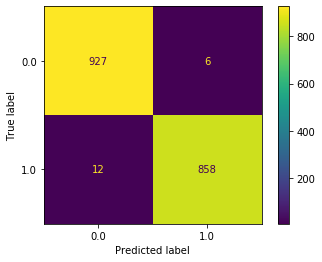

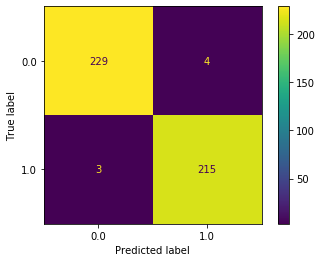

In [108]:
plot_confusion_matrix(clf_gb,X_train,y_train)
err = np.sum(clf_gb.predict(X_train) == y_train)/len(y_train)
print("Error train:",(1-err)*100,"%")

plot_confusion_matrix(clf_gb, X_test,y_test)
err = np.sum(clf_gb.predict(X_test) == y_test)/len(y_test)
print("Error test:",(1-err)*100,"%")

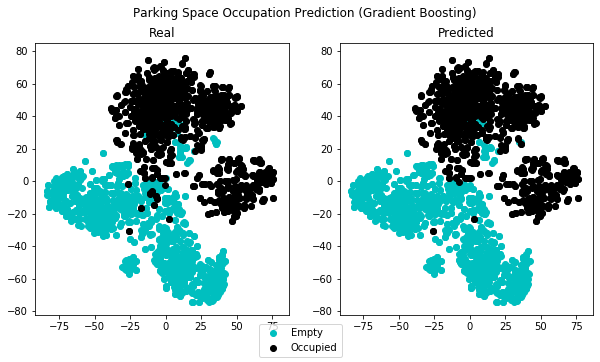

In [109]:
labels = clf_gb.predict(X_e)
plotPredictions(X_e, real_labels, labels,"Parking Space Occupation Prediction (Gradient Boosting)")